In [3]:
import pandas as pd
df=pd.read_csv('loan_data.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### **Finding missing values and Feature Engineering**

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Filling categorical values with the mode of the respective columns


In [6]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

In [7]:
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

Filling continous values with the mean


In [8]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Filling categorical columns with numerical values

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Married"]=le.fit_transform(df["Married"])
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
df["Property_Area"]=le.fit_transform(df["Property_Area"])
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])
df["Dependents"]=le.fit_transform(df["Dependents"])
df["Education"]=le.fit_transform(df["Education"])

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [12]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler=MinMaxScaler()

In [13]:
df=df.drop("Loan_ID",axis=1)

In [14]:
mm_scaler.fit_transform(df)

array([[1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [16]:
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=df["Loan_Status"],test_size=0.2)

### Computation

In [20]:
import keras

In [1]:
import tensorflow as tf

In [19]:
from keras.models import Sequential

In [20]:
from keras.layers import InputLayer, Dense

In [23]:
#Calculation of neurons: The number of features we have in the dataset=No. of neurons
input_neurons=X_train.shape[1] #here 1 specifies column

In [24]:
print(input_neurons)

11


In [25]:
#This is a binary classification problem, so the number of output neurons=1
output_neurons=1

In [26]:
#Defining hidden layers is arbitrary 
number_of_hidden_layers=2
neurons_hidden_layer_1=10
neurons_hiddent_layer_2=5

In [27]:
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons)))

In [29]:
model.add(Dense(units=neurons_hidden_layer_1,activation="relu"))
model.add(Dense(units=neurons_hiddent_layer_2, activation="relu"))
model.add(Dense(units=output_neurons,activation="sigmoid"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [31]:
#Compiling the model
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [35]:
model_history=model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 726.0268 - accuracy: 0.3136 - val_loss: 540.9363 - val_accuracy: 0.3089
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 444.8189 - accuracy: 0.3136 - val_loss: 343.1503 - val_accuracy: 0.3089
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 199.2775 - accuracy: 0.3809 - val_loss: 89.4367 - val_accuracy: 0.4715
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 53.0572 - accuracy: 0.6273 - val_loss: 58.4189 - val_accuracy: 0.6667
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 44.4709 - accuracy: 0.6619 - val_loss: 49.9713 - val_accuracy: 0.5772
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 38.6967 - accuracy: 0.6273 - val_loss: 45.3352 - val_accuracy: 0.6098
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 35.4271 - accuracy: 0.6456 - val_loss: 41.6804 - val_accuracy: 0.6098
E

In [37]:
from sklearn.metrics import accuracy_score
predictions=model.predict_classes(X_test)
accuracy_score(y_test,predictions)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.6829268292682927

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
Se

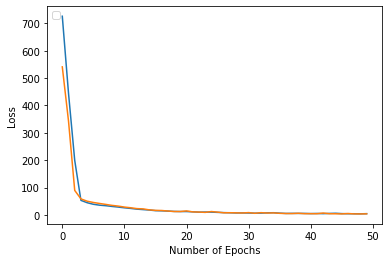

In [46]:
#Summarizing history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend("train","validation",loc='upper left')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

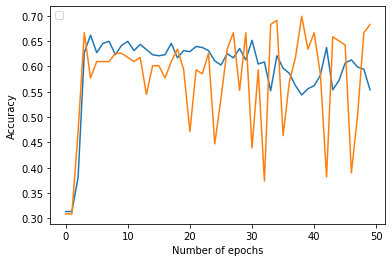

In [49]:
#Summarizing history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend('train','validation',loc='upper left')
plt.show()